
# 1. Introduction

This study has been developed for the purposes of the EMPIR project “Metrology for the Factory of the Future” (Met4FoF) -  Activity A1.2.2 of the Work Package 1.Two laboratories in PTB and CEM posses conventional dynamic calibration set-ups for acceleration sensors under test. This section describes different methods for the interlaboratory study on the comparison of measurement results of digital - output acceleration sensor (DUT). The study covered two laboratories with their individual set-ups.  Among in-detailed analysis of the data, three case studies (according to GUM, GUM-S1 and weighted values) were applied as the inputs for the one method of comparison - En values calculation.  The second method of comparison relies on the weighted difference. The analysis required data transformation from time domain signals to the frequency domain, sine approximation and Gaussian error propagation. The selected sensor for acceleration measurements is a three-axial low-g acceleration sensor with digital output, which allows measurements of acceleration in three perpendicular axes. Only an X-axis acceleration was observed during the study. 

## 1.1. State of the art

In conventional dynamic calibration procedures for acceleration sensors, the acceleration used for the sensor input is applied either as **a sinusoidal excitation with a given frequency and amplitude** or as **a singular shock-like excitation characterized by pulse width and intensity**. 
<br>The quantity is then measured by a reference sensor and by the device under test (DUT). The results of DUT are compared to the reference and hence characterized and linked to the SI. In a dynamic calibration situation, the response of the DUT to time-varying input is the major interest. Hence, it is crucial that the mechanical input operates simultaneously and equally on the reference and DUT. Both, the reference and the DUT provide **electrical outputs (typical voltage)** while **the data acquisition electronics** of the system provides **the analogue to digital conversion (ADC).**
In order to connect the reference and the DUT to the ADC system, two analogue channels are needed. In order to get reliable information on the time dependent response, the timing of the data acquisition on the two channels has to be synchronized. This is typically accomplished by provision of a common clock signal to drive the sampling units of the ADC and a common trigger to start (or mark) the beginning of the acquisition. 

## 1.2. The extension of conventional dynamic calibration systems to digital-output sensors 

In a set-up where the DUT is a digital-output sensor,the sampling of the DUT time series is no longer under the control (trigger, clock) of the calibration system. Instead, the DUT comprises its own digitizer unit with a time base independent of the calibration system. In fact, a typical conventional calibration set-up does not provide an input for digital data at all.
The solution to this problem requires two extensions:
1.	A digital acquisition unit (DAU) which is capable to connect to the digital interface of the sensor under calibration and store/transmit the DUT time-series for later analysis
2.	An additional synchronization signal that provides the link between the time-base of the calibration system and the time-base of the DUT.

The concept for the extension of existing facilities for dynamic calibration uses a custom digital acquisition unit microcontroller board with a connected reference time signal for traceable time stamping of acquired data points. This allows for a synchronised data acquisition from the reference measurement and the DUT. 


The selected laboratories posses their set-ups and the calibration items were calibrated in both set-ups.The analysis required transformation from time domain to the frequency domain, where frequencies and corresponding magnitudes and phases were calculated.The measurement conditions were kept according to the laboratory standard conditions. 

Each laboratory submitted HDFT files containing groups:
- EXPERIMENTS - containing 171 files (experiment) corresponding to the sine excitations
- RAWDATA - where data from ADCs (*voltage, absolute time, absolute time uncertainty*)  and sensors (*absolute time, absolute time uncertainty, acceleration, angular velocity, magnetic flux density and temperature*) can be approached during the measurements
- RAWTRANSFERFUNCTION - *this group contains quantities of interest: frequencies, amplitudes, assigned uncertainties of amplitudes, phases,  assigned uncertainties of phases, excitation amplitudes and assigned uncertainties of excitation amplitudes
- REFERENCEDATA - reference data from ADCs and sensors.

Measurement characteristics of DUT are given in the Table 1 below
    
| <b>PTB<b> | Sensor | Internal ADC |
| --- | --- | --- |
| <b>Name<b> | MPU 9250| STM 32 Internal ADC |
| <b>ID<b>  | 535035904 | 535038464 |
| <b>Quantity<b>  | X Acceleration | Voltage  @CH1 |
| <b>Unit<b>  | $\frac{m}{s^{2}}$ | V |    
| <b>Resolution<b>  | 65536,0 (16-bit) | 4096,0 (12-bit) |
| <b>Min. scale<b>  | -156,91439819335938 $\frac{m}{s^{2}}$  | -10 V |
| <b>Min. scale<b>  | 156,90960693359375 $\frac{m}{s^{2}}$  | 10 V |
    
| <b>CEM<b> | Sensor | Internal ADC |
| --- | --- | --- |
| <b>Name<b> | MPU 9250| STM 32 Internal ADC |
| <b>ID<b>  | 3167420416 | 31674422976 |
| <b>Quantity<b>  | X Acceleration | Voltage  @CH1 |
| <b>Unit<b>  | $\frac{m}{s^{2}}$ | V |    
| <b>Resolution<b>  | 65536,0 (16-bit) | 4096,0 (12-bit) |
| <b>Min. scale<b>  | -156,91439819335938 $\frac{m}{s^{2}}$  | -10 V |
| <b>Min. scale<b>  | 156,90960693359375 $\frac{m}{s^{2}}$  | 10 V |
    
    
The calibration range of the study was selected in accordance with the current measurement capabilities of the participating laboratories. 

In [ ]:
import h5py
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import scipy.stats as stats
#conda install -c conda-forge miktex in command prompt
import seaborn as sns
from ipywidgets import widgets, Layout#this is optionally, must be installed 
from IPython import display #this is optionally
import warnings
from scipy import stats

In [ ]:
#FOR LATEX -takes longer to run plots

#plt.rc('font', family='serif')
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
#PLTSCALFACTOR =2
#SMALL_SIZE = 8 * PLTSCALFACTOR
#MEDIUM_SIZE =9 * PLTSCALFACTOR
#BIGGER_SIZE = 11 * PLTSCALFACTOR

#plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
#plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
#plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
#plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
#plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
#plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
#plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 2.Extract the data

Data for ILC comparison is extracted from the HDF5 files separately for PTB and CEM. The extracted data is sorted by frequency at the end of the Notebook and saved into Excel file.

In [ ]:
def extract_data(filename, sensor_ID):
    #explore the HDF5 file, folders and subfolders
    with h5py.File(filename,'r') as f:
        base_items=list(f.items())
        print("\nItems in directory", base_items)
        rawtransfer=f.get("RAWTRANSFERFUNCTION")
        rawtransfer_items=list(rawtransfer.items())
        print("\nItems in reference", rawtransfer_items)
        subgroup=rawtransfer.get("/RAWTRANSFERFUNCTION/"+sensor_ID)
        subgroup_items=list(subgroup.items())
        print("\n"+sensor_ID+"items:",subgroup_items)
        subgroup_acceleration=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration")
        subgroup_acceleration_items=list(subgroup_acceleration.items())
        print("\nAcceleration items:",subgroup_acceleration_items)
        subgroup_acceleration_5mem=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration")
        subgroup_acceleration_5mem_items=list(subgroup_acceleration_5mem.items())
        print("\nAcceleration items_5members:", subgroup_acceleration_5mem_items)
        frequency=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Excitation_frequency")
        frequency_items=list(frequency.items())
        print("\nFrequency", frequency_items)
        magnitude=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Magnitude")
        magnitude_items=list(magnitude.items())
        print("\nMagnitude", magnitude_items)
        phase=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Phase")
        phase_items=list(magnitude.items())
        print("\nPhase", phase_items)
        
        
        #extract frequencies, magnitude, phase, uncertainties and all excitation parameters
        frequency_values=np.array(frequency.get("value"))
        magnitude_values=np.array(magnitude.get("value"))
        magnitude_uncertainties=np.array(magnitude.get("uncertainty"))
        phase_values=np.array(phase.get("value"))
        phase_uncertainties=np.array(phase.get("uncertainty"))
        excitation_freq_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Excitation_frequency")
        excitation_freq=np.array(excitation_freq_items.get("value"))
        excitation_amp_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_ID+"/Acceleration/Acceleration/Excitation_amplitude")
        excitation_amp=np.array(excitation_amp_items.get("value"))
        excitation_amp_uncertainty=np.array(excitation_amp_items.get("uncertainty"))
        
        #join all necessary data in 2D array
        total_array=np.stack((frequency_values,magnitude_values,magnitude_uncertainties,phase_values, phase_uncertainties,excitation_freq,excitation_amp,excitation_amp_uncertainty), axis=1)
        print("\nArray dimensions:", total_array.shape)
        column_names=["Frequency [Hz]", r"$x_{M},$ [m s^-2/m s^-2]",r"$U_{M},$ [m s^-2/m s^-2]", r"$x_{\phi},$ [rad]", r"$U_{\phi},$ [rad]","Excitation_freq [Hz]",r"$x_{Aexcit},$ [m s^-2/m s^-2]",r"$U_{Aexcit},$ [m s^-2/m s^-2]"]
        whole_dataset=pd.DataFrame(total_array, columns=column_names)
        f.close()
        
        
        return whole_dataset

In [ ]:
whole_dataset_PTB = extract_data('BMA280PTB.hdf5',"0x1fe40000_BMA_280")
#whole_dataset_PTB = extract_data('MPU9250PTB.hdf5',"0x1fe40000")

In [ ]:
whole_dataset_PTB.head(2)

Phase data for PTB must be reverted:

In [ ]:
whole_dataset_PTB[[r"$x_{\phi},$ [rad]"]] = whole_dataset_PTB[[r"$x_{\phi},$ [rad]"]]-np.pi
whole_dataset_PTB.head(2)

In [ ]:
whole_dataset_CEM = extract_data('BMA280CEM.hdf5',"0xbccb0000_BMA_280")
#whole_dataset_CEM = extract_data('MPU9250CEM.hdf5',"0xbccb0000")

In [ ]:
whole_dataset_CEM.head(2)

In [ ]:
whole_dataset_CEM[[r"$x_{\phi},$ [rad]"]] = whole_dataset_CEM[[r"$x_{\phi},$ [rad]"]]
whole_dataset_CEM.head(2)

# 3.Data analysis

The study consisted of ten measurement cycles for PTB and nine measurement cycles for CEM in the frequency range of (10.0 - 250.0)Hz. Each measurement cycle contained seventeen calibration points within the selected frequency range. The individual measurements in the one cycle are called “experiments”. Each calibration point in one cycle was quantified in terms of estimated values and standard deviations of magnitude and phase.  These values arose from the sine-fitting and conversion
of time-domain signals into frequency domain. The provided data sets also include the excitation amplitude values, whose variations from the targeted values are known and not considered.  The CEM’s set-up always starts measurement at frequencies of 80.0 Hz and 250.0 Hz respectively, before targeting the calibration point at 10.0Hz. In particular, the magnitude and phase values originating from this characteristic of the CEM’s set-up have not been considered.

## 3.1 Introduction plots

In [ ]:
def plot_dataset(dataset,name):

    
    plt.figure(figsize=(15,20))
    plt.subplot(311)
    plt.plot(dataset[r"$x_{M},$ [m s^-2/m s^-2]"])
    plt.ylabel(r"$x_{M},$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$" )#fontsize=14)
    plt.xlabel("Experiments")#fontsize=14)
    plt.title(name) #fontsize=14)

    plt.subplot(312)
    plt.plot(np.rad2deg(dataset[r"$x_{\phi},$ [rad]"].values))
    plt.ylabel(r"$x_{\phi},$ in$^\circ$")#, fontsize=14)
    plt.xlabel("Experiments")#,fontsize=14)

    plt.subplot(313)
    plt.plot(dataset[r"$x_{Aexcit},$ [m s^-2/m s^-2]"])
    plt.ylabel(r"$x_{Aexcit},$ in $ \frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")#,fontsize=14)
    plt.xlabel("Experiments")#,fontsize=14)
    plt.show()

In [ ]:
plot_dataset(whole_dataset_PTB,"PTB")

In [ ]:
plot_dataset(whole_dataset_CEM,"CEM")
# peaks are individual behaviour, the system at CEM works in a way that starts with the freq of 80 Hz.

Graphs show measurement cycles, where each poing on x-axis corresponds to the one experiment. PTB conducted 10 measurement cycles, resulting in ten values for magnitude and phase at each calibration point (frequency in a range from 10.0 Hz and 250 Hz). Cycles in CEM's dataset start with 80.0 Hz and 250.0 Hz instead of 10.0 Hz, which is the consequence of the current set-up. These starting points are deleted in order to compare the cycles in a range from 10.0 Hz and 250 Hz and the total number of measurement cycles for the corrected CEM data is 9, meaning that there are nine values for magnitude and phase at each calibration point.

In [ ]:
delete_rows=[]

for k in range(0,171,19):
    i=k
    j=k+1
    delete_rows.append(i)
    delete_rows.append(j)
whole_dataset_CEM_new=whole_dataset_CEM.drop(axis=0,index=delete_rows)

In [ ]:
plot_dataset(whole_dataset_CEM_new,"CEM corrected")


The calibration procedure for PTB and CEM was conducted in a similar way and the further analysis covers the examination of changes in mangitudes and phases on different frequencies. The first calibration point is at 10 Hz because the shaker in the calibration system should be bigger in order to achieve lower frequencies. Additionally, some variations are present for excitation amplitude values because it is hard to achieve the targeted values (usually vary around 1%).

In [ ]:
def split_data_by_frequencies(dataset):
    dict_of_frequencies=dict(iter(dataset.groupby('Frequency [Hz]')))
    return dict_of_frequencies
    #list_of_frequencies=np.array([10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250])

In [ ]:
#check if all frequencies are the same
PTB_separated_by_freq=split_data_by_frequencies(whole_dataset_PTB)
CEM_separated_by_freq=split_data_by_frequencies(whole_dataset_CEM)
CEM_separated_by_freq_new=split_data_by_frequencies(whole_dataset_CEM_new)
print("Frequencies - PTB:",PTB_separated_by_freq.keys())
print("Frequencies - CEM:",CEM_separated_by_freq.keys())

In [ ]:
PTB_separated_by_freq.get(10).head(1)

In [ ]:
CEM_separated_by_freq_new.get(10).head(1)

In [ ]:
q_names=list(PTB_separated_by_freq.get(10).columns)

The quantities of interest from the dictionaries are ${x_{M}},{x_{\phi}}$, with assigned expanded uncertainties ${U_{M}},{U_{\phi}}$.

The estimated values in every experiment were calculated as mean values, while the assigned error bars correspond to the standard uncertainties according to GUM, representing the Gaussian error propagation. The following plots show magnitude values  and phase values for all measurements done atfrequencies within the calibration range.
The interval of  ${x_{i}} -\sigma _{i}$ and ${x_{i}} +\sigma _{i}$  is plotted for each cycle and frequency, where $\sigma _{i}$ is calculated as   $\frac{U _{i}}{2}$.

In [ ]:
def plot_x_plus_minus_sigma(dictionary,names):
    range_mag,range_ph,index_mag=np.empty(len(dictionary.values())),np.empty(len(dictionary.values())),np.empty(len(dictionary.values()))
    index_ph=np.empty(len(dictionary.values()))
    for i,val in enumerate(dictionary.values()):
        data_dict_mag = {}
        data_dict_mag['cycle'] =list(range(len(val)))
        data_dict_mag['lower'] = val[r"$x_{M},$ [m s^-2/m s^-2]"].values-val[r"$U_{M},$ [m s^-2/m s^-2]"].values/2
        data_dict_mag['upper'] = val[r"$x_{M},$ [m s^-2/m s^-2]"].values+val[r"$U_{M},$ [m s^-2/m s^-2]"].values/2
        dataset_mag = pd.DataFrame(data_dict_mag)
        range_mag[i]=(dataset_mag['upper']-dataset_mag['lower']).max()
        index_mag[i]=(dataset_mag['upper']-dataset_mag['lower']).idxmax()
        
        data_dict_phase = {}
        data_dict_phase['cycle'] =list(range(len(val)))
        data_dict_phase['lower'] = val[r"$x_{\phi},$ [rad]"].values-val[r"$U_{\phi},$ [rad]"].values/2
        data_dict_phase['upper'] = val[r"$x_{\phi},$ [rad]"].values+val[r"$U_{\phi},$ [rad]"].values/2
        dataset_phase = pd.DataFrame(data_dict_phase)
        range_ph[i]=(dataset_phase['upper']-dataset_phase['lower']).max()
        index_ph[i]=(dataset_phase['upper']-dataset_phase['lower']).idxmax()
        #data_dict_excit = {}
        #data_dict_excit['cycle'] =list(range(len(val)))
        #data_dict_excit['lower'] = val[r"$x_{Aexcit},$ [m s^-2/m s^-2]"].values-val[r"$U_{Aexcit},$ [m s^-2/m s^-2]"].values/2
        #data_dict_excit['upper'] = val[r"$x_{Aexcit},$ [m s^-2/m s^-2]"].values+val[r"$U_{Aexcit},$ [m s^-2/m s^-2]"].values/2
        #dataset_excit = pd.DataFrame(data_dict_excit)


        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)

        for lower,upper,y in zip(dataset_mag['lower'],dataset_mag['upper'],range(len(dataset_mag))):
            plt.plot((lower,upper),(y,y),'ro-',color='orange')
        plt.yticks(range(len(dataset_mag)),list(dataset_mag['cycle']))
        plt.title(str(val[names[0]].values[0])+" Hz")
        plt.xlabel("Magnitude in " r"$\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$", fontsize=14)
        plt.ylabel("Experiment",fontsize=14)

        plt.subplot(1,2,2)
        for lower,upper,y in zip(dataset_phase['lower'],dataset_phase['upper'],range(len(dataset_phase))):
            plt.plot((np.rad2deg(lower),np.rad2deg(upper)),(y,y),'ro-',color='orange')
        plt.yticks(range(len(dataset_phase)),list(dataset_phase['cycle']))
        plt.title(str(val[names[0]].values[0])+" Hz")
        plt.xlabel("Phase  "r"in$^\circ$", fontsize=14)
        plt.ylabel("Experiment",fontsize=14)

        #plt.subplot(1,3,3)
        #for lower,upper,y in zip(dataset_excit['lower'],dataset_excit['upper'],range(len(dataset_excit))):
            #plt.plot((lower,upper),(y,y),'ro-',color='orange')
        #plt.yticks(range(len(dataset_excit)),list(dataset_excit['cycle']))
        #plt.xlabel("Excitation amplitude")
        #plt.ylabel("Measurement cycle")
        #plt.title(str(val[names[0]].values[0])+" Hz")
    plt.show()
    range_mag=pd.DataFrame(range_mag,index=[10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0],columns=["Magntiude range, [m s^-2/m s^-2]"])
    range_ph=pd.DataFrame(range_ph,index=[10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0],columns=["Phase range, [rad]"])
    index_mag=pd.DataFrame(index_mag,index=[10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0],columns=["Index_M"])
    index_ph=pd.DataFrame(index_ph,index=[10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0],columns=["Index_Ph"])
    
    return range_mag,range_ph,index_mag,index_ph

In [ ]:
range_mag_PTB,range_ph_PTB,index_mag_PTB,index_ph_PTB=plot_x_plus_minus_sigma(PTB_separated_by_freq,q_names)

Plots show that the intervals based on the values  ($ {x_{i}} -\sigma _{i}$ and ${x_{i}} +\sigma _{i}$) vary within different experiments at a specific frequency. Some experiments have wide interval and some intervals are narrow. Therefore, the next step is to find the widest intervals at each frequency, which actually corresponds to the experiment with the highest expanded uncertainty (${x_{i}} +\sigma _{i} - ({x_{i}} -\sigma _{i}) = 2*\sigma _{i} = U _{i}$)

In [ ]:
# create output widgets
#widget1 = widgets.Output()
#widget2 = widgets.Output()
#cm = sns.light_palette("green", as_cmap=True)

#with widget1:
    #display.display(range_mag_PTB.style.set_caption('Magnitude range').background_gradient(cmap=cm))

#with widget2:
    #display.display(range_ph_PTB.style.set_caption('Phase range').background_gradient(cmap=cm))


# add some CSS styles to distribute free space
#box_layout = Layout(display='flex',
                    #flex_flow='row',
                    #justify_content='space-around',
                    #width='auto'
                   #)
    
# create Horisontal Box container
#hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
#hbox

In [ ]:
range_mag_CEM,range_ph_CEM,index_mag_CEM,index_ph_CEM=plot_x_plus_minus_sigma(CEM_separated_by_freq_new,q_names)

In [ ]:
#create output widgets
#widget1 = widgets.Output()
#widget2 = widgets.Output()
#cm = sns.light_palette("green", as_cmap=True)

#with widget1:
    #display.display(range_mag_CEM.style.set_caption('Magnitude range').background_gradient(cmap=cm))

#with widget2:
    #display.display(range_ph_CEM.style.set_caption('Phase range').background_gradient(cmap=cm))


# add some CSS styles to distribute free space
#box_layout = Layout(display='flex',
                    #flex_flow='row',
                    #justify_content='space-around',
                    #width='auto'
                   #)
    
# create Horisontal Box container
#hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
#hbox

In [ ]:
indices_PTB=pd.concat([index_mag_PTB, index_ph_PTB],axis=1) #indices of experiments of the highest uncert.
indices_CEM=pd.concat([index_mag_CEM, index_ph_CEM],axis=1) #indices of experiments of the highest uncert.

# create output widgets
#widget1 = widgets.Output()
#widget2 = widgets.Output()
#cm = sns.light_palette("green", as_cmap=True)

#with widget1:
    #display.display(indices_PTB.style.set_caption('PTB'))
#with widget2:
    #display.display(indices_CEM.style.set_caption('CEM'))

# add some CSS styles to distribute free space
#box_layout = Layout(display='flex',
                    #flex_flow='row',
                    #justify_content='space-around',
                    #width='auto'
                   #)
    
# create Horisontal Box container
#hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
#hbox

When analyzing the sequence of experiments at which the highest uncertainties occur, it cannot be said that one experiment is extremly dominant or unstable. However, when analyzing both laboratories, at some frequencies the highest uncertainties for the magnitude were detected in the same experiment as the highest uncertainties of the phases. This can be a consequence of the common source of error for both quantities.

In the next plots, the estimated values in every experiment were calculated as mean values, while the assigned error bars correspond to the standard uncertainties according to GUM, representing the Gaussian error propagation. The plots show magnitude values and phase values  for all measurements done at frequencies within the calibration range. The results indicate that the magnitude values obtained by PTB’s calibration process are higher at each calibration point than those obtained by the CEM’s.   


When accompanying standard uncertainties are added, magnitude values are completely distinguishable in the frequency range (31.5 - 46.7) Hz and at 53.3 Hz while other results are in a good agreement.  The highest uncertainties of magnitudes have been detected and compared,  as it follows:  (12.5 - 20.0) Hz - PTB’s setup shows higher uncertainties than CEM, (40.0 - 50.0) Hz - CEM’s setup shows higher uncertainties than PTB’s and (63.0 - 250.0)Hz - CEM’s setup shows higher uncertainties than PTB’s.  In general, except for calibration points at 31.5 Hz and 53.3 Hz, CEM’s set up provides higher magnitude uncertainties at frequencies higher than 25.0 Hz.  The standard uncertainty at 10.0 Hz for CEM’s set-up in this case can be a consequence of reaching the values of 80.0 Hz and 250.0 Hz before each measurement cycle, which brings some discrepancies in stability of the system at the beginning of a measurement procedure. On the other hand, high standard uncertainty values at low frequencies for PTB’s set-up might be caused by the mechanical nature of the system.

In [ ]:
for val1,val2 in zip(PTB_separated_by_freq.values(),CEM_separated_by_freq_new.values()):  
    plt.figure(figsize=(25,7))
    plt.subplot(1,2,1)
 
    x = np.linspace(0,len(val1[q_names[1]]),len(val1[q_names[1]]))
    dy = val1[q_names[2]].values/2
    y = val1[q_names[1]].values
    plt.xlabel("Experiment",fontsize=14)
    plt.ylabel(r"$x_{M},$ in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
    plt.errorbar(x, y, yerr=dy, fmt='.k',ecolor='r',label="PTB")
    plt.title(str(val1[q_names[0]].values[0])+" Hz")
    
    x1 = np.linspace(0,len(val2[q_names[1]]),len(val2[q_names[1]]))
    plt.errorbar(x1,y=val2[q_names[1]].values,yerr =val2[q_names[2]].values/2,fmt='ro',ecolor='g',label="CEM")
    plt.legend()

    plt.subplot(1,2,2)
    x = np.linspace(0,len(val1[q_names[3]]),len(val1[q_names[3]]))
    dy = (val1[q_names[4]].values/np.pi*180)/2
    y = (val1[q_names[3]].values/np.pi)*180
    plt.xlabel("Measurement cycle")
    plt.ylabel(r"$x_{\phi},$ [^\circ]")
    plt.errorbar(x, y, yerr=dy, fmt='.k',ecolor='r',label="PTB")
                         
    x1 = np.linspace(0,len(val2[q_names[3]]),len(val2[q_names[3]]))
    plt.errorbar(x1,y=val2[q_names[3]].values/np.pi*180,yerr =val2[q_names[4]].values/2/np.pi*180,fmt='ro',ecolor='g',label="CEM")
    plt.legend()
    
    #plt.subplot(1,3,3)
    #x = np.linspace(0,len(val1[q_names[6]]),len(val1[q_names[6]]))
    #dy = val1[q_names[7]].values/2
    #y = val1[q_names[6]].values
    #plt.xlabel("Measurement cycle")
    #plt.ylabel(r"$x_{Aexcit},$ [m s^-2/m s^-2]")
    #plt.errorbar(x, y, yerr=dy, fmt='.k',ecolor='r',label="PTB")
                          
    #x1 = np.linspace(0,len(val2[q_names[6]]),len(val2[q_names[6]]))
    #plt.errorbar(x1,y=val2[q_names[6]].values,yerr =val2[q_names[7]].values/2,fmt='ro',ecolor='b',label="CEM")
    plt.legend()
    plt.show()
    
    #the phase  - its timing information is not very susceptible, similar for PTB and CEM 
#Magnitude  - The difference between CEM and PTB is not the consequence of the different calibration systems. 
#sensor is differently behaving in Spain due to the influence of the tempeerature. Also, it is cheap and the axis can be different 
#cosine error

#Magnitude - manufacturer specifies 1% of tranfer coefficient deviation. Normally, higher uncertainty is stated because 
#due to the mounting influence. (statistically + extraunc)

In [ ]:
range_mag_PTB=range_mag_PTB.rename(columns={"Magntiude range, [m s^-2/m s^-2]":"Magntiude range, [m s^-2/m s^-2]-PTB"})
range_mag_CEM=range_mag_CEM.rename(columns={"Magntiude range, [m s^-2/m s^-2]":"Magntiude range, [m s^-2/m s^-2]-CEM"})
range_mag=pd.concat([range_mag_PTB, range_mag_CEM],axis=1)

range_ph_PTB=range_ph_PTB.rename(columns={"Phase range, [rad]":"Phase range, [rad]-PTB"})
range_ph_CEM=range_ph_CEM.rename(columns={"Phase range, [rad]":"Phase range, [rad]-CEM"})
range_ph=pd.concat([range_ph_PTB, range_ph_CEM],axis=1)


In [ ]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [ ]:
#OPTIONALLY
# create output widgets
#widget1 = widgets.Output()
#widget2 = widgets.Output()


#with widget1:
    #display.display(range_mag.style.apply(highlight_max,axis=1,props='color:white;background-color:pink'))

#with widget2:
    #display.display(range_ph.style.apply(highlight_max,axis=1,props='color:white;background-color:pink')
#)
  #add some CSS styles to distribute free space
#box_layout = Layout(display='flex',
                    #flex_flow='row',
                    #justify_content='space-around',
                    #width='auto'
                   #)
    
# create Horisontal Box container
#hbox = widgets.HBox([widget1, widget2], layout=box_layout)

# render hbox
#hbox

## 3.2 Coefficient of variation

The coefficient of variation represents the ratio of the standard deviation to the mean, and in that sense is a useful statistical tool for comparing the degree of variation from one dataseries to another.  The coefficient of variation (CV) was calculated as a statistical measure of the dispersion of data points in a data series around the mean.  Because each measurement cycle provides the estimated values and standard uncertainties, CV in percentages is calculated as[1]

$$CV={\frac {\sigma _{i}}{\bar {x_{i}}}} *100 $$
,where x represents estimated magnitude/phase originating from the corresponding cycle $\sigma$ corresponds to the standard uncertainty.

In [ ]:
for val1,val2 in zip(PTB_separated_by_freq.values(),CEM_separated_by_freq_new.values()):  
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
 
    x = np.linspace(0,len(val1[q_names[1]]),len(val1[q_names[1]]))
    y_coef = ((val1[q_names[2]].values/2)/np.abs(val1[q_names[1]].values))*100
    plt.xlabel("Experiment")
    plt.ylabel( r"CV in $\%$ - magnitude")
    plt.plot(x, y_coef,color='r',label="PTB")
    plt.title(str(val1[q_names[0]].values[0])+" Hz")
    x1 = np.linspace(0,len(val2[q_names[1]]),len(val2[q_names[1]])) 
    plt.plot(x1,((val2[q_names[2]].values/2)/np.abs(val2[q_names[1]].values))*100,color='g',label="CEM")
    plt.legend()

    plt.subplot(1,2,2)
    x = np.linspace(0,len(val1[q_names[3]]),len(val1[q_names[3]]))
    y = ((val1[q_names[4]].values/2)/np.abs(val1[q_names[3]].values))*100
    plt.xlabel("Experiment")
    plt.ylabel(  r"CV in $\%$ - phase")
    plt.plot(x, y,color='r',label="PTB")
    x1 = np.linspace(0,len(val2[q_names[4]]),len(val2[q_names[4]]))                      
    plt.plot(x1,((val2[q_names[4]].values/2)/np.abs(val2[q_names[3]].values))*100,color='g',label="CEM")
    plt.legend()
    
    #plt.subplot(1,3,3)
    #x = np.linspace(0,len(val1[q_names[6]]),len(val1[q_names[6]]))
    #y = (val1[q_names[7]].values/np.abs(val1[q_names[6]].values))*100
    #plt.xlabel("Measurement cycle")
    #plt.ylabel(r"$x_{Aexcit},$ [m s^-2/m s^-2], CV[%]")
    #plt.plot(x, y, color='r',label="PTB")
                          
    #x1 = np.linspace(0,len(val2[q_names[6]]),len(val2[q_names[6]]))
    #plt.plot(x1,(val2[q_names[7]].values/np.abs(val2[q_names[6]].values))*100,color='b',label="CEM")
    plt.show()
    

Since many experiments were performed ateach calibration point, the averaged CV was calculated for both set-ups (PTB and CEM) indefined calibration range:
$${\bar {CV}={\frac{\sum _{i=1}^{n}CV _{i}}{n}}}$$
,where n represents the number of experiments at a specific frequency.

In [ ]:
def calculate_mean_variation_coefficient(dictionary):
    variation_coef=np.empty((len(dictionary),3))
    for val1,i in zip(dictionary.values(),range(len(dictionary))):  
        variation_coef[i,0]=(((val1[q_names[2]].values/2)/np.abs(val1[q_names[1]].values))*100).mean()
        variation_coef[i,1]=(((val1[q_names[4]].values/2)/np.abs(val1[q_names[3]].values))*100).mean()
        variation_coef[i,2]=(((val1[q_names[7]].values/2)/np.abs(val1[q_names[6]].values))*100).mean()
    return variation_coef

In [ ]:
variation_coef_PTB=calculate_mean_variation_coefficient((PTB_separated_by_freq))
variation_coef_CEM=calculate_mean_variation_coefficient((CEM_separated_by_freq_new))

In [ ]:
print(variation_coef_PTB)

In [ ]:
print(variation_coef_CEM)

In [ ]:
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,1)
    list_of_freq=[10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250]
    x = np.asarray(list_of_freq)
    y_coef = variation_coef_PTB[:,0]
    
    plt.xlabel("Frequency in Hz")
    plt.ylabel(r"CV in $\%$ - magnitude")
    plt.plot(x, y_coef,color='r',label="PTB")
    plt.plot(x,variation_coef_CEM[:,0],color='g',label="CEM")
    plt.legend()

    plt.subplot(1,3,2)
    x = np.asarray(list_of_freq)
    plt.xlabel("Frequency in Hz")
    plt.ylabel(r"CV in $\%$ - phase")
    plt.plot(x, variation_coef_PTB[:,1],color='r',label="PTB")
    plt.plot(x,variation_coef_CEM[:,1],color='g',label="CEM")
    plt.legend()
    
    #plt.subplot(1,3,3)
    #x = np.asarray(list_of_freq)
    #plt.xlabel("Frequencies, Hz")
    #plt.ylabel(r"$x_{Aexcit},$ [m s^-2/m s^-2], CV[%]")
    #plt.plot(x, variation_coef_PTB[:,2], color='r',label="PTB")
    #plt.plot(x, variation_coef_CEM[:,2],color='b',label="CEM")
    #plt.legend() 
    #plt.show()
    

From the graphs it is visible that the averaged CV of magnitude values for PTB’s set-up is generally lower than for CEM’s at higher frequencies.  The same appears for the phase values.  In addition to this, the averaged CV of phases varies up to 2.0 %,
whereas the averaged CV of magnitude rises to 0.4%.  The CEM’s set-up has significantly higher coefficient of variation at all calibration points in a range (63.0 - 200.0) Hz.  Whenobserving the magnitude data, the lowest averaged CV for PTB’s setup is at 40.0 Hz and equals to 0.035%. and the lowest averaged CV for CEM’s setup, of 0.04%, corresponds to the calibration point at 53.3 Hz. The largest coefficient of variation for PTB’s setup is at 12.5 Hzand equals to 0.27%. The largest coefficient of variation for CEM is 0.31% and corresponds to the calibration point of 100.0 Hz The trend of variation is similar for both laboratories. When observing phase data, CV is higher for PTB at low frequencies - up to 53.3 Hz and is decreasing at frequencies higher than 46.7 Hz while CEM’s data shows an increasing trendat frequencies between 125.0 Hz and 160.0 Hz.  The CV for both laboratories is lower at higher frequencies and show better agreement. The CV is generally higher for phase values than for magnitude values. The largest CV for PTB is 2.12% at 12.5 Hz and 0.91% at 63.0Hz for CEM.

## 3.3  The extraction of temperature data

As mentioned above, the magnitude values measured by PTB setup are always higher than for CEM. The possible source of disagreement might be related to the environmental conditions such as temperature. 

In [ ]:
def extract_temp (filename, sensor_ID):
    
    with h5py.File(filename,'r') as f:
            base_items=list(f.items())
            rawtransfer=f.get("EXPERIMENTS")
            rawtransfer_items=list(rawtransfer.items())
            subgroup=rawtransfer.get("/EXPERIMENTS/Sine excitation/")
            subgroup_items=list(subgroup.items())
            temp=[None]*(len(subgroup_items))

            for i,val in enumerate(subgroup_items):
                subgroup1=rawtransfer.get("/EXPERIMENTS/Sine excitation/00"+"{0:03}".format(i)+"Sine_Excitation/"+sensor_ID+"/Temperature/")
                subgroup1=np.array(subgroup1.get("SinPOpt"))
                temp[i]=subgroup1[0,1]
            return temp

In [ ]:
temp_PTB = extract_temp('MPU9250PTB_v5.hdf5',"0x1fe40000")
temp_CEM = extract_temp('MPU9250CEM_v5.hdf5',"0xbccb0000")

In [ ]:
temp_PTB=pd.DataFrame(temp_PTB,columns=["Temperature [°C]"])
temp_PTB["Frequency [Hz]"]=whole_dataset_PTB["Frequency [Hz]"]

In [ ]:
temp_CEM=pd.DataFrame(temp_CEM,columns=["Temperature [°C]"])
temp_CEM["Frequency [Hz]"]=whole_dataset_CEM["Frequency [Hz]"]

In [ ]:
delete_rows=[]

for k in range(0,171,19):
    i=k
    j=k+1
    delete_rows.append(i)
    delete_rows.append(j)
temp_CEM_new=temp_CEM.drop(axis=0,index=delete_rows)

## 3.4 Additional analysis of magnitude and phase data 

For the further analysis, data is sorted by frequency in ascending order. Note that this analysis does not take uncertainties into account.

In [ ]:
#this is for analysis in Excel
def sort_values(dataset):
    dataset=dataset.sort_values("Frequency [Hz]", ascending=True)
    return dataset

In [ ]:
whole_dataset_PTB=sort_values(whole_dataset_PTB)
whole_dataset_CEM=sort_values(whole_dataset_CEM_new)

In [ ]:
whole_dataset_PTB.head(2)

In [ ]:
whole_dataset_CEM.head(2)

In order to plot magnitude and phase data in a relation to the frequency values in linear and logarithmic scale, the mean values of all experiments are calculated and stored in variables: *whole_dataset_PTB_groupby* and *whole_dataset_CEM_groupby*  

In [ ]:
whole_dataset_PTB_groupby=whole_dataset_PTB.groupby(['Frequency [Hz]']).mean()
whole_dataset_CEM_groupby=whole_dataset_CEM.groupby(['Frequency [Hz]']).mean()

In [ ]:
whole_dataset_PTB["Lab"]="PTB"
whole_dataset_CEM["Lab"]="CEM"
whole_dataset_PTB_groupby["Lab"]="PTB"
whole_dataset_CEM_groupby["Lab"]="CEM"

In [ ]:
result = pd.concat([whole_dataset_PTB,whole_dataset_CEM])
result_groupby= pd.concat([whole_dataset_PTB_groupby,whole_dataset_CEM_groupby])

In [ ]:
f,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,8))
sns.scatterplot(x=result_groupby.index, y=r"$x_{M},$ [m s^-2/m s^-2]", hue="Lab",ax=ax[0],
                    data=result_groupby) #palette="Set2")
sns.scatterplot(x=result_groupby.index, y=r"$x_{M},$ [m s^-2/m s^-2]", hue="Lab",ax=ax[1],
                    data=result_groupby )
ax[1].set_xscale("log")
ax[1].set_xlabel("log (Frequency [Hz])")
plt.show()

In [ ]:
f,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,18))
sns.scatterplot(x=result_groupby.index, y=r"$x_{\phi},$ [rad]", hue="Lab",ax=ax[0],
                    data=result_groupby) #palette="Set2")
sns.scatterplot(x=result_groupby.index, y=r"$x_{\phi},$ [rad]", hue="Lab",ax=ax[1],
                    data=result_groupby )
ax[1].set_xscale("log")
ax[1].set_xlabel("log (Frequency [Hz])")
plt.show()

Violin plots are shown for magnitudes and phases at different frequencies. <b>These plots do not include uncertainties. A short explanation of a violin plot is as follows:

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.

The anatomy of a violin plot have many of the same summary statistics as box plots:
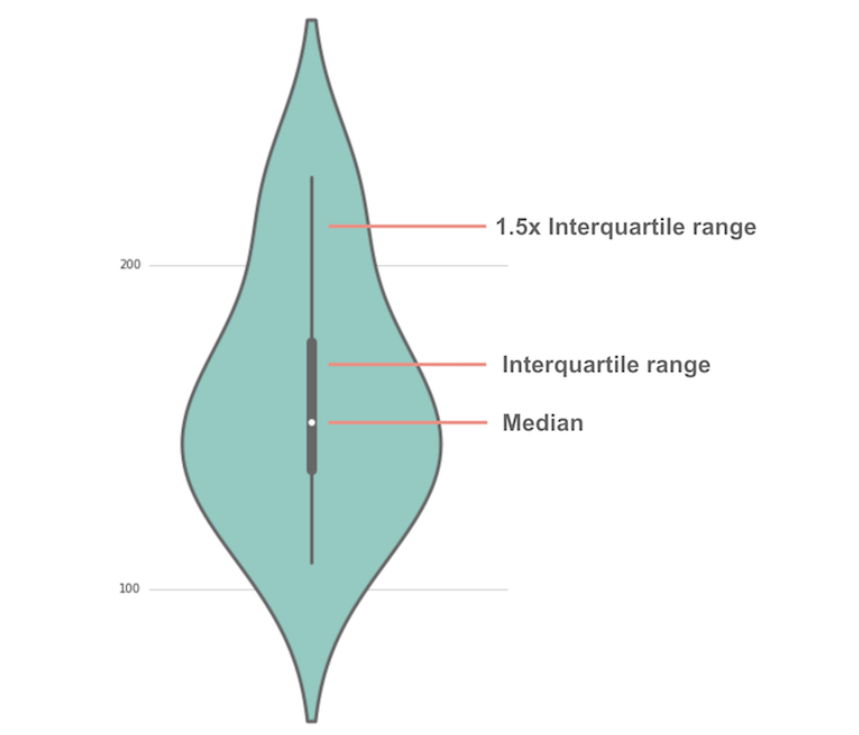
<br>-the white dot represents the median
<br>-the thick gray bar in the center represents the interquartile range
<br>-the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.

On each side of the gray line is a kernel density estimation to show the distribution shape of the data. Wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability.
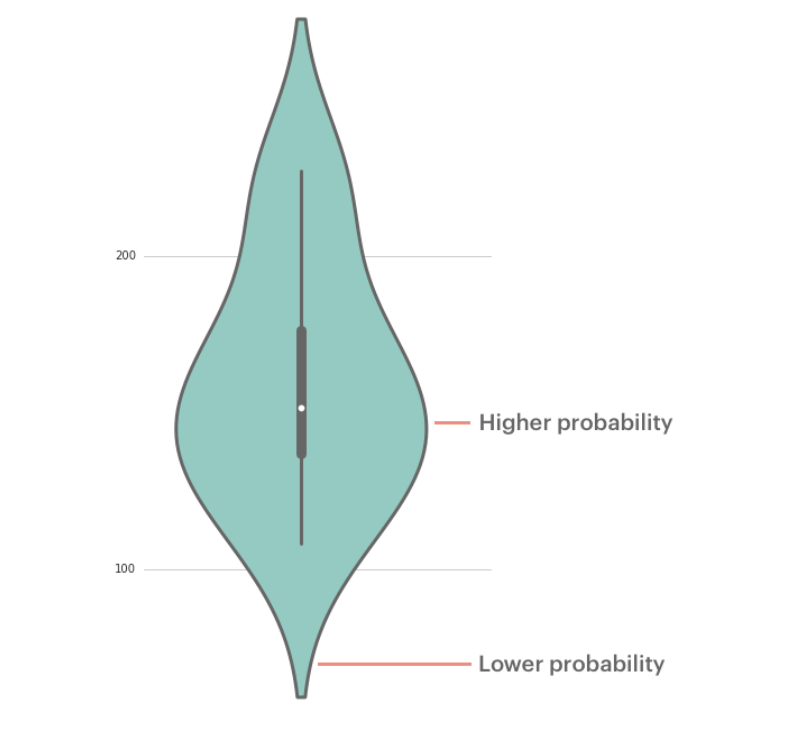



In [ ]:
list_freq=result["Frequency [Hz]"].unique()
f,ax=plt.subplots(nrows=len(list_freq),ncols=2,figsize=(15,100))
for i,val in enumerate(list_freq):
    
    result1=result.loc[result["Frequency [Hz]"].values==val,:]
    
    sns.violinplot(x="Frequency [Hz]", y=r"$x_{M},$ [m s^-2/m s^-2]", hue="Lab",ax=ax[i,0],
                    data=result1, palette="muted", split=False,orient="v")
    sns.violinplot(x="Frequency [Hz]", y=r"$x_{\phi},$ [rad]", hue="Lab",ax=ax[i,1],
                    data=result1, palette="muted", split=False,orient="v")

At some frequencies distribution of quantities of interest is multimodal and at is near to normal, left or right skewed. 

In [ ]:

warnings.filterwarnings('ignore')
for i,val in enumerate(list_freq):
    
    result1=result.loc[result["Frequency [Hz]"].values==val,:]
    result2=result1[['Frequency [Hz]', r"$x_{M},$ [m s^-2/m s^-2]",r"$x_{\phi},$ [rad]","Lab"]]
    sns.pairplot(result2, hue="Lab")
    

In [ ]:
result2=result[['Frequency [Hz]',r"$x_{M},$ [m s^-2/m s^-2]",r"$x_{\phi},$ [rad]","Lab"]]
sns.pairplot(result2, hue="Lab")

## 3.5 The effect of environmental temperature on magnitude and phase

Indeed, the initial assessment points out that ambient temperature was higher in the PTB’s laboratory than in CEM’s. Moreover, digital sensors have an integrated temperature sensor which could cause some influence on the quantities of an interest.

In [ ]:
#takes some time tu run because of a huge number of points
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.lineplot(x=np.arange(len(temp_CEM_new)), y=temp_CEM_new["Temperature [°C]"].values,ax=ax, label="CEM")
sns.lineplot(x=np.arange(len(temp_PTB)), y=temp_PTB["Temperature [°C]"].values,ax=ax, label="PTB")
plt.xlabel("Experiment")
plt.ylabel("Temperature, °C")
plt.legend()                         
plt.show()

In [ ]:
temp_2_PTB=pd.concat([whole_dataset_PTB,temp_PTB["Temperature [°C]"]],axis=1)
temp_2_CEM=pd.concat([whole_dataset_CEM_new,temp_CEM_new["Temperature [°C]"]],axis=1)

The position of the temperature sensor must be taken into consideration. If the temperature is not affected by the presence of people, the change of magnitude and phase shows opposite behaviour in a relation to the change of temperature.  At this step, this conclusion is not reliable because the temeprature is an independent variable, whereas the magnitude and phase are dependant on calibration procedure. 

In [ ]:
def plot_vs_temp(data,col1,col2,label,lab):
    plt.figure(figsize=(10,5))
    data[col1].plot(label="Temperature [°C]",legend=True)
    plt.ylabel("Temperature, °C")
    data[col2].plot(secondary_y=True, label=r"$x_{M},$ in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$",legend=True)
    plt.xlabel("Experiment")
    plt.ylabel(r"$x_{M},$ in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
    plt.title(lab)
    plt.show()

In [ ]:
plot_vs_temp(temp_2_PTB,"Temperature [°C]",r"$x_{M},$ [m s^-2/m s^-2]",r"$x_{M},$ [m s^-2/m s^-2]","PTB")

In [ ]:
plot_vs_temp(temp_2_CEM,"Temperature [°C]",r"$x_{M},$ [m s^-2/m s^-2]",r"$x_{M},$ [m s^-2/m s^-2]","CEM")

In [ ]:
def plot_vs_temp_2(data,col1,col2,label,lab):
    plt.figure(figsize=(10,5))
    data[col1].plot(label="Temperature [°C]", legend=True,figsize=(15,5))
    plt.ylabel("Temperature, °C",fontsize=14)
    data[col2]=np.rad2deg(data[col2].values)
    data[col2].plot(secondary_y=True, label=label, legend=True)
    plt.xlabel("Experiment",fontsize=14)
    plt.ylabel(label,fontsize=14)
    plt.title(lab,fontsize=14)
    plt.show()

In [ ]:
plot_vs_temp_2(temp_2_PTB,"Temperature [°C]",r"$x_{\phi},$ [rad]",r"$x_{\phi}$, in $^\circ$","PTB")

In [ ]:
plot_vs_temp_2(temp_2_CEM,"Temperature [°C]",r"$x_{\phi},$ [rad]",r"$x_{\phi}$, in $^\circ$","CEM")

In [ ]:
temp_2_PTB=temp_2_PTB.sort_values(by=["Frequency [Hz]"])
temp_2_CEM=temp_2_CEM.sort_values(by=["Frequency [Hz]"])

In [ ]:
list_freq=whole_dataset_PTB["Frequency [Hz]"].unique()
f,ax=plt.subplots(nrows=len(list_freq),ncols=2,figsize=(15,100))
for i,val in enumerate(list_freq):
    result1=temp_2_PTB.loc[temp_2_PTB["Frequency [Hz]"].values==val,:]
    sns.regplot(x=result1["Temperature [°C]"].values, y=result1[r"$x_{M},$ [m s^-2/m s^-2]"].values, ax=ax[i,0])
    ax[i,0].set_ylim([result1[r"$x_{M},$ [m s^-2/m s^-2]"].min(), result1[r"$x_{M},$ [m s^-2/m s^-2]"].max()])
    ax[i,0].set_title(str(val)+ " PTB")
    ax[i,0].set_xlabel("Temperature, [°C]")
    ax[i,0].set_ylabel("Magnitude, [m s^-2/m s^-2]")
    result1=temp_2_CEM.loc[temp_2_CEM["Frequency [Hz]"].values==val,:]
    sns.regplot(x=result1["Temperature [°C]"].values, y=result1[r"$x_{M},$ [m s^-2/m s^-2]"].values, ax=ax[i,1])
    ax[i,1].set_ylim([result1[r"$x_{M},$ [m s^-2/m s^-2]"].min(), result1[r"$x_{M},$ [m s^-2/m s^-2]"].max()])
    ax[i,1].set_title(str(val)+" CEM")
    ax[i,1].set_xlabel("Temperature, [°C]")
    ax[i,1].set_ylabel("Magnitude, [m s^-2/m s^-2]")
plt.show()

In [ ]:
list_freq=whole_dataset_PTB["Frequency [Hz]"].unique()
f,ax=plt.subplots(nrows=len(list_freq),ncols=2,figsize=(15,100))
for i,val in enumerate(list_freq):
    result1=temp_2_PTB.loc[temp_2_PTB["Frequency [Hz]"].values==val,:]
    sns.regplot(x=result1["Temperature [°C]"].values, y=result1[r"$x_{\phi},$ [rad]"].values, ax=ax[i,0])
    ax[i,0].set_ylim([result1[r"$x_{\phi},$ [rad]"].min(), result1[r"$x_{\phi},$ [rad]"].max()])
    ax[i,0].set_title(str(val)+ " PTB")
    ax[i,0].set_xlabel("Temperature, [°C]")
    ax[i,0].set_ylabel("Phase, [rad]")
    result1=temp_2_CEM.loc[temp_2_CEM["Frequency [Hz]"].values==val,:]
    sns.regplot(x=result1["Temperature [°C]"].values, y=result1[r"$x_{\phi},$ [rad]"].values, ax=ax[i,1])
    ax[i,1].set_ylim([result1[r"$x_{\phi},$ [rad]"].min(), result1[r"$x_{\phi},$ [rad]"].max()])
    ax[i,1].set_title(str(val)+" CEM")
    ax[i,1].set_xlabel("Temperature, [°C]")
    ax[i,1].set_ylabel("Phase, [°]")
plt.show()

The Pearson correlation coefficients  between:
<br> magnitude and temeperature and 
<br> phase and temperature 

are calculated at each frequency for PTB and CEM. The correlation coefficients are mostly negative, which are in line with the previous statement about the opposite behaviour. The correlation can be further examined by significance testing (p-value can be calculated). However, some guidelines for the values of correlation coefficients have been found in literature and shown on the Figure below:
    
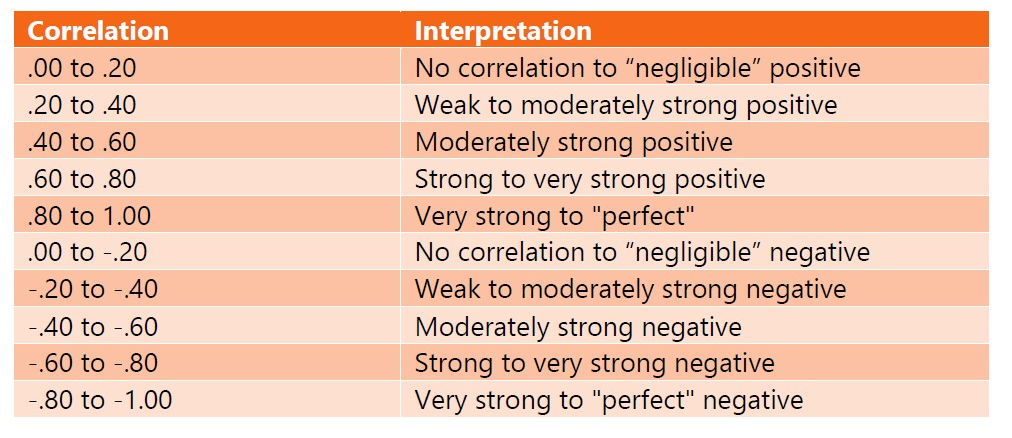
   

In [ ]:
def Pearson_correlation(data,col1,col2):
    list_freq=data["Frequency [Hz]"].unique()
    corr_coef=np.zeros(len(list_freq))
    ci=np.zeros((len(list_freq),2))
    pval=np.zeros(len(list_freq))
    for i,val in enumerate(list_freq):
        data1=data.loc[data["Frequency [Hz]"].values==val,:]
        corr_coef[i],pval[i] = stats.pearsonr(data1[col1].values,data1[col2].values)
        se = 1/np.sqrt(len(data1)-3)
        r_z = np.arctanh(corr_coef[i])
        alpha = 0.05
        z = stats.norm.ppf(1-alpha/2)
        lo_z, hi_z = r_z-z*se, r_z+z*se
        lo, hi = np.tanh((lo_z, hi_z))
        ci[i,0]=lo
        ci[i,1]=hi
    return corr_coef,ci,pval

In [ ]:
corr_magnitude=np.zeros((len(temp_2_PTB["Frequency [Hz]"].unique()),2))
corr_magnitude[:,0],ci_PTB_magnitude,p_PTB_magnitude=Pearson_correlation(temp_2_PTB,"Temperature [°C]",r"$x_{M},$ [m s^-2/m s^-2]")
corr_magnitude[:,1],ci_CEM_magnitude,p_CEM_magnitude=Pearson_correlation(temp_2_CEM,"Temperature [°C]",r"$x_{M},$ [m s^-2/m s^-2]")
corr_magnitude=pd.DataFrame(corr_magnitude, columns=["PTB","CEM"],index=temp_2_PTB["Frequency [Hz]"].unique())

The lower and upper limits of a confidence interval for correlation coefficients have different sign at all frequencies except 40.0 Hz  for PTB and at all frequencies except 160.0 Hz for CEM which means that it cannot be fully accepted that the correlation is negative.

In [ ]:
CI_val=np.concatenate((ci_PTB_magnitude,ci_CEM_magnitude),axis=1)
CI_val_magnitude=pd.DataFrame(CI_val,columns=['PTB_lower','PTB_upper','CEM_lower', "CEM_upper"], index=temp_2_PTB["Frequency [Hz]"].unique())

In [ ]:
CI_val_magnitude

Additional check is made by the calculation of the p-value. p-value evaluates how well the data rejects the null hypothesis, which states that there is no relationship between two compared groups. Successfully rejecting this hypothesis tells that results may be statistically significant.  Alpha is usually set to 0.05, meaning the probability of achieving the same or more extreme results assuming the null hypothesis is 5%. If the p-value is less than the specified alpha value, the null hypothesis is rejected.

In [ ]:
p_val_magnitude=np.zeros((len(p_PTB_magnitude),2))
p_val_magnitude[:,0]=p_PTB_magnitude
p_val_magnitude[:,1]=p_CEM_magnitude

p_val_magnitude=pd.DataFrame(p_val_magnitude,columns=['PTB', "CEM"], index=temp_2_PTB["Frequency [Hz]"].unique())
p_val_magnitude.style.applymap(lambda x: 'background-color : green' if x<0.05 else 'background-color : red')

The null hypothesis that states that there is no relationships between magnitude and temperature can be rejected at frequencies 40.0 Hz and for PTB  and at 160.0 Hz for CEM because the p-values are less than 0.05. 

In [ ]:
corr_magnitude.head(2)

The same procedure is now applied to the examination of the relationship between phase values and temperature.

In [ ]:
corr_phase=np.zeros((len(temp_2_PTB["Frequency [Hz]"].unique()),2))
corr_phase[:,0],ci_PTB_phase,p_PTB_phase=Pearson_correlation(temp_2_PTB,"Temperature [°C]",r"$x_{\phi},$ [rad]")
corr_phase[:,1],ci_CEM_phase,p_CEM_phase=Pearson_correlation(temp_2_CEM,"Temperature [°C]",r"$x_{\phi},$ [rad]")
corr_phase=pd.DataFrame(corr_phase, columns=["PTB","CEM"],index=temp_2_PTB["Frequency [Hz]"].unique())

In [ ]:
corr_phase.head(2)

In [ ]:
CI_val=np.concatenate((ci_PTB_phase,ci_CEM_phase),axis=1)
CI_val_phase=pd.DataFrame(CI_val,columns=['PTB_lower','PTB_upper','CEM_lower', "CEM_upper"], index=temp_2_PTB["Frequency [Hz]"].unique())

In [ ]:
CI_val_phase.head()

In [ ]:
p_val_phase=np.zeros((len(p_PTB_phase),2))
p_val_phase[:,0]=p_PTB_phase
p_val_phase[:,1]=p_CEM_phase

p_val_phase=pd.DataFrame(p_val_phase,columns=['PTB', "CEM"], index=temp_2_PTB["Frequency [Hz]"].unique())
p_val_phase.style.applymap(lambda x: 'background-color : green' if x<0.05 else 'background-color : red')

The null hypothesis that states that there is no relationships between phase and temperature can be rejected only at a frequencies of 20.0 Hz and 50.0 Hz for PTB because the p-value is less than 0.05.

## 3.5.1 The correlation from sampling

From introduction plots in 3.1, it can be visible that data of interest for PTB and CEM is overlapping once when uncertainties are included. The previous correlation coefficients have not included the influence of uncertainties. In order to see the effect of uncertainties on correlation coefficients, data is sampled from the normal distribution defined by the mean value at a specific experiment and its standard deviation - given as the expanded uncertainty divided by 2. Then, the mean correlation coefficient is calculated. This is built as some kind of an abbreviated Monte Carlo method and performed for the joint data only, but can be applied for the separate conditions for PTB and CEM.

In [ ]:
def Pearson_correlation_sampling(data,col1,col2,col3):
    list_freq=data["Frequency [Hz]"].unique()
    corr_coef=np.zeros(len(list_freq))
    for i,val in enumerate(list_freq):
        data1=data.loc[data["Frequency [Hz]"].values==val,:]
        corr_coef1=np.zeros(50)
        x=np.zeros((len(data1),50))
        for a,item in enumerate(data1.index):
            x[a,:]=np.random.normal(data1[col2].values[a],data1[col3].values[a]/2,50)
        for col in range(x.shape[1]):
            corr_coef1[col],_ = stats.pearsonr(data1[col1].values,x[:,col])
        corr_coef[i]=corr_coef1.mean()
    return corr_coef

In [ ]:
corr_magnitude_sampled_PTB=np.zeros(len(temp_2_PTB["Frequency [Hz]"].unique()))
corr_magnitude_sampled_PTB=Pearson_correlation_sampling(temp_2_PTB,"Temperature [°C]",r"$x_{M},$ [m s^-2/m s^-2]",r"$U_{M},$ [m s^-2/m s^-2]")

In [ ]:
corr_phase_sampled_PTB=np.zeros(len(temp_2_PTB["Frequency [Hz]"].unique()))
corr_phase_sampled_PTB=Pearson_correlation_sampling(temp_2_PTB,"Temperature [°C]",r"$x_{\phi},$ [rad]",r"$U_{\phi},$ [rad]")

In [ ]:
corr_magnitude_sampled_PTB

In [ ]:
corr_phase_sampled_PTB

In [ ]:
corr_magnitude_sampled_CEM=np.zeros(len(temp_2_CEM["Frequency [Hz]"].unique()))
corr_magnitude_sampled_CEM=Pearson_correlation_sampling(temp_2_CEM,"Temperature [°C]",r"$x_{M},$ [m s^-2/m s^-2]",r"$U_{M},$ [m s^-2/m s^-2]")

In [ ]:
corr_phase_sampled_CEM=np.zeros(len(temp_2_CEM["Frequency [Hz]"].unique()))
corr_phase_sampled_CEM=Pearson_correlation_sampling(temp_2_CEM,"Temperature [°C]",r"$x_{\phi},$ [rad]",r"$U_{\phi},$ [rad]")

In [ ]:
corr_magnitude_sampled_CEM

In [ ]:
corr_phase_sampled_CEM

According to this analysis, the correlation between magnitude and temperature  and between phase and temperature for both laboratories is negligible.

# 8. Datasets for the Excel validation

In [ ]:
writer2 = pd.ExcelWriter('All_datasets.xlsx')

whole_dataset_CEM.to_excel(writer2, sheet_name = 'CEM', index = False)
whole_dataset_PTB.to_excel(writer2, sheet_name = 'PTB', index = False)

writer2.save()

# References

[1] https://www.investopedia.com/terms/c/coefficientofvariation.asp
<br>[2] https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
<br>[3] https://en.wikipedia.org/wiki/Effective_sample_size
<br>[4] https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1
<br>[5] https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/